In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom_df=pd.read_csv('telecom_churn_data.csv')
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [15]:
cat_column=telecom_df.select_dtypes(include=object).columns
cat_column

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [16]:
num_column=telecom_df.select_dtypes(exclude=object).columns
num_column

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**Bi variate Analysis**

- 

In [5]:
telecom_df['mail_subscribed'].value_counts()

mail_subscribed
no     1430
yes     570
Name: count, dtype: int64

In [6]:
telecom_df['multi_screen'].value_counts()

multi_screen
no     1802
yes     198
Name: count, dtype: int64

In [9]:
telecom_df['gender'].value_counts()

gender
Male      1053
Female     923
Name: count, dtype: int64

In [10]:

con1=telecom_df['mail_subscribed']=='yes'
con2=telecom_df['gender']=='Male'
con3=con1&con2
len(telecom_df[con3])

280

In [17]:
mail_data=telecom_df['mail_subscribed'].unique()
for i in mail_data:
    con1=telecom_df['mail_subscribed']==i
    con2=telecom_df['gender']=='Male'
    con3=con1&con2
    l=len(telecom_df[con3])
    print (f"the number of Male mail subscribe {i}",l)
    

the number of Male mail subscribe no 773
the number of Male mail subscribe yes 280


In [18]:
mail_data=telecom_df['mail_subscribed'].unique()
for i in mail_data:
    con1=telecom_df['mail_subscribed']==i
    con2=telecom_df['gender']=='Female'
    con3=con1&con2
    l=len(telecom_df[con3])
    print (f"the number of Male mail subscribe {i}",l)
    

the number of Male mail subscribe no 639
the number of Male mail subscribe yes 284


In [23]:
mail_data=telecom_df['mail_subscribed'].unique()
mlist,flist=[],[]
for i in mail_data:
    con1=telecom_df['mail_subscribed']==i
    con2=telecom_df['gender']=='Male'
    con3=telecom_df['gender']=='Female'
    male_count=con1&con2
    female_count=con1&con3
    
    l=len(telecom_df[male_count])
    l1=len(telecom_df[female_count])
    print (f"the number of Male mail subscribe {i}",l)
    print (f"the number of FeMale mail subscribe {i}",l1)
    mlist.append(l)
    flist.append(l1)

the number of Male mail subscribe no 773
the number of FeMale mail subscribe no 639
the number of Male mail subscribe yes 280
the number of FeMale mail subscribe yes 284


In [31]:

# Create DataFrame
Mail_df = pd.DataFrame({
    'mail_subscribed': mail_data,
    'Male': mlist,
    'Female': flist
})

print(Mail_df)


  mail_subscribed  Male  Female
0              no   773     639
1             yes   280     284


In [39]:
cols = ['Mail_subscibe_Yes','Mail_Subscibe_No']
df1 = pd.DataFrame([mlist, flist], index=['Male', 'Female'], columns=cols)
print(df1)

        Mail_subscibe_Yes  Mail_Subscibe_No
Male                  773               280
Female                639               284


**Cross Tab**

In [40]:
pd.crosstab(telecom_df['mail_subscribed'],telecom_df['gender'])

gender,Female,Male
mail_subscribed,,
no,639,773
yes,284,280


In [41]:
index_column=telecom_df['mail_subscribed']
data_column=telecom_df['gender']
df2=pd.crosstab(index_column,data_column)
df2

gender,Female,Male
mail_subscribed,,
no,639,773
yes,284,280


<Axes: xlabel='mail_subscribed'>

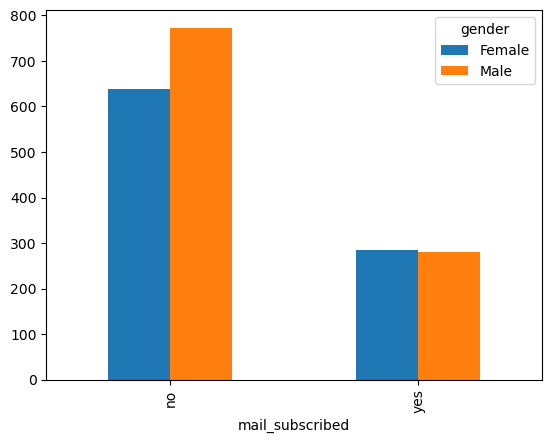

In [43]:
df2.plot(kind='bar')

**Multivariate analysis**

In [44]:
index_column=telecom_df['mail_subscribed']
data_column=[telecom_df['gender'], telecom_df['multi_screen']]
df3=pd.crosstab(index_column,data_column)
df3

gender          Female     Male    
multi_screen        no yes   no yes
mail_subscribed                    
no                 582  57  694  79
yes                253  31  249  31

In [46]:
index_column=telecom_df['gender']
data_column=[telecom_df['mail_subscribed'], telecom_df['multi_screen']]
df4=pd.crosstab(index_column,data_column)
df4

mail_subscribed   no      yes    
multi_screen      no yes   no yes
gender                           
Female           582  57  253  31
Male             694  79  249  31

In [47]:
index_column=telecom_df['multi_screen']
data_column=[telecom_df['gender'],telecom_df['mail_subscribed']]
df4=pd.crosstab(index_column,data_column)
df4

gender          Female      Male     
mail_subscribed     no  yes   no  yes
multi_screen                         
no                 582  253  694  249
yes                 57   31   79   31

**Numerical Vs Numerical**

- Scatter plot give relation between two numerical columns

- plt.scatter

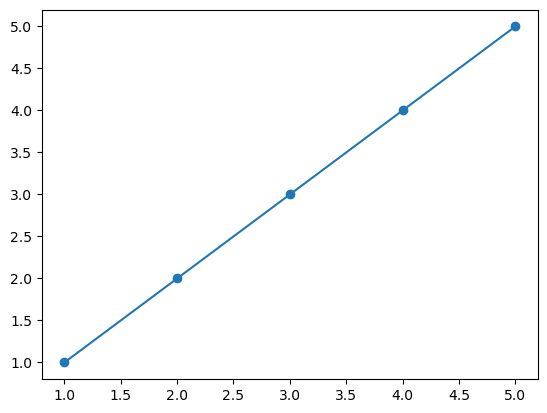

In [5]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

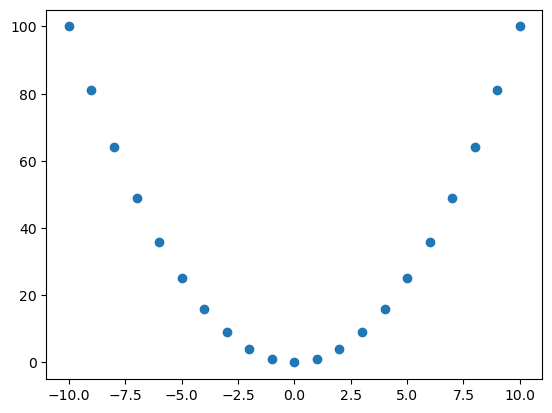

In [10]:
# Plot the parabola
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)

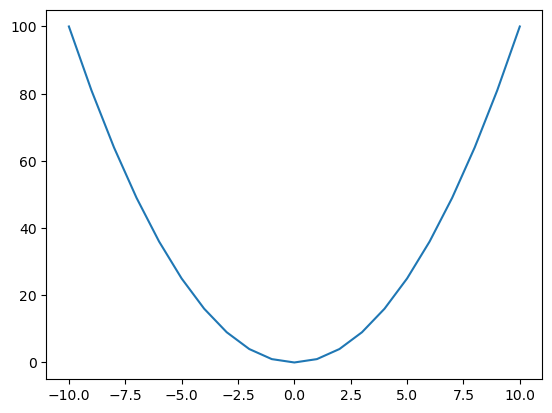

In [12]:
plt.plot(x,y)

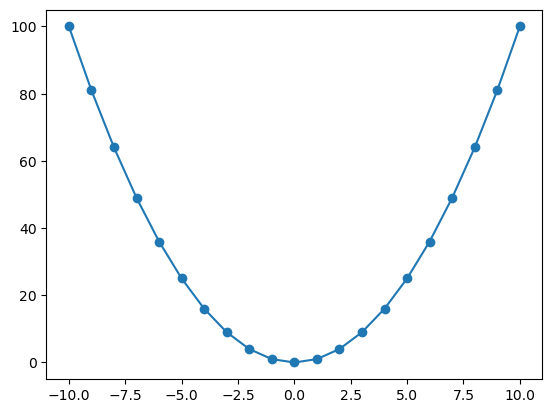

In [13]:
plt.scatter(x,y)
plt.plot(x,y)

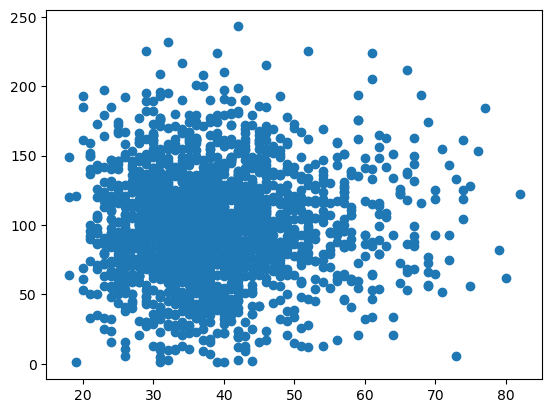

In [18]:
col1=telecom_df['age']
col2=telecom_df['no_of_days_subscribed']
plt.scatter(col1,col2)

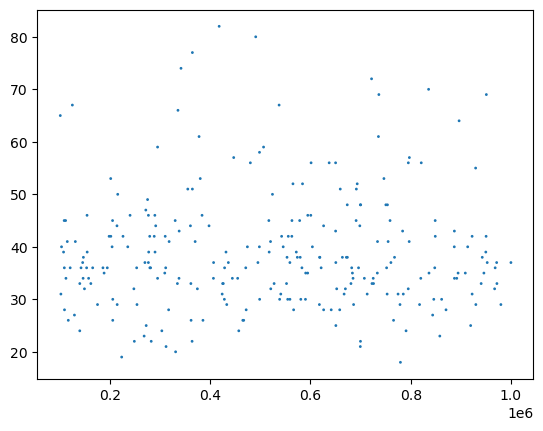

In [21]:
col1=telecom_df.customer_id
col2=telecom_df.age
col3=telecom_df.churn
plt.scatter(col1,col2,col3)

Text(0, 0.5, 'churn')

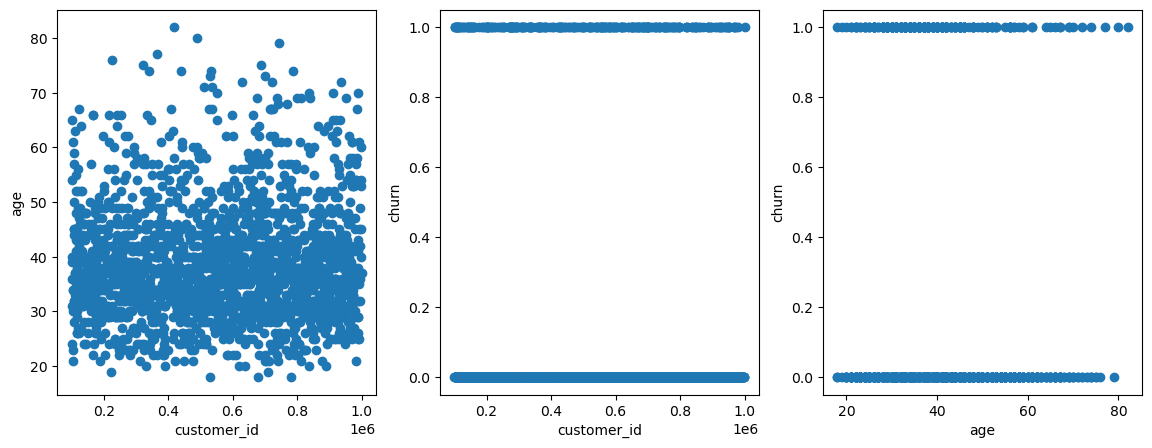

In [28]:
col1=telecom_df.customer_id
col2=telecom_df.age
col3=telecom_df.churn

plt.figure(figsize=(14,5))

plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('customer_id')
plt.ylabel('age')


plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('customer_id')
plt.ylabel('churn')

plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('age')
plt.ylabel('churn')

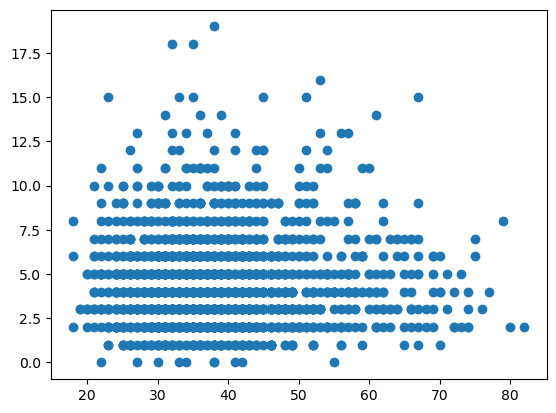

In [29]:
col1=telecom_df['age']
col2=telecom_df['videos_watched']
plt.scatter(col1,col2)

**Covarrience and Corelation**

**Method .corr**

In [31]:
telecom_df.corr(numeric_only=True)

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,NaN,1.000000,0.023830,-0.011457,-0.013830,0.033733,-0.013834,0.009713,0.063967,0.045145,-0.036009,-0.056777
age,NaN,0.023830,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006690,0.000618,0.011631
no_of_days_subscribed,NaN,-0.011457,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.017961,0.013419,0.002528
weekly_mins_watched,NaN,-0.013830,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.013635,-0.036848,0.165871
minimum_daily_mins,NaN,0.033733,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.932155,-0.003943,0.067668
maximum_daily_mins,NaN,-0.013834,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.013634,-0.036854,0.165870
weekly_max_night_mins,NaN,0.009713,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026676,-0.003965,0.006211
videos_watched,NaN,0.063967,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033829,-0.001201,-0.020780
maximum_days_inactive,NaN,0.045145,0.006690,0.017961,-0.013635,0.932155,-0.013634,0.026676,0.033829,1.000000,-0.001572,0.048040


**Heat Map**

  - One of the important visualization method to show Matrix form of method

 - under the seaborn package

 - Heat map give color visualization also provides color bar, which color indicate which value

C:\Users\gslon\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


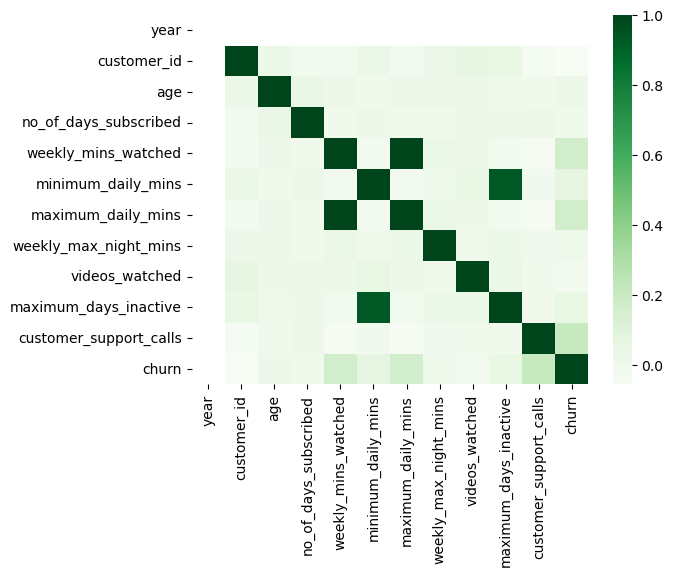

In [37]:
corr_data=telecom_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

C:\Users\gslon\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


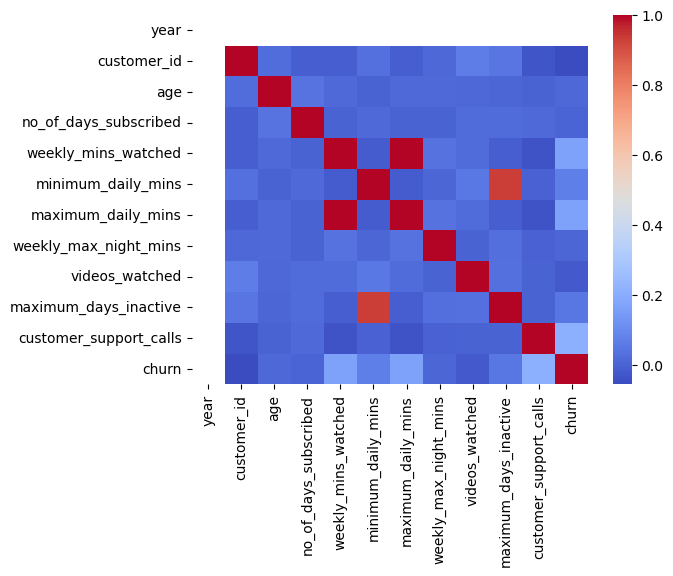

In [38]:
corr_data=telecom_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.show()

C:\Users\gslon\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


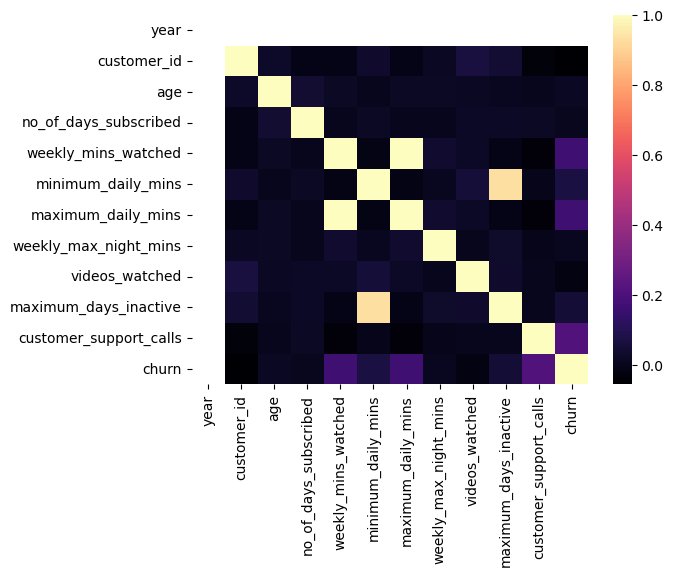

In [39]:
corr_data=telecom_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='magma')
plt.show()